In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans  

In [2]:
df = pd.read_csv('Cleaned.csv', index_col=0)

In [3]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Response,Age,Amount_Total,Total_Purchases,Children,Family_Size,Total_AcceptedCmp,Days_Active
0,Graduation,Single,58138.0,58,635,88,546.0,172,88,88,...,0,0,1,57.0,1445,25.0,0,1,1,914
1,Graduation,Single,46344.0,38,11,1,6.0,2,1,6,...,0,0,0,60.0,25,6.0,2,3,0,88
2,Graduation,In Relationship,71613.0,26,426,49,127.0,111,21,42,...,0,0,0,49.0,665,21.0,0,2,0,447
3,Graduation,In Relationship,26646.0,26,11,4,20.0,10,3,5,...,0,0,0,30.0,43,8.0,1,3,0,40
4,PhD,In Relationship,58293.0,94,173,43,118.0,46,27,15,...,0,0,0,33.0,376,19.0,1,3,0,228


In [4]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Amount_Total',
       'Total_Purchases', 'Children', 'Family_Size', 'Total_AcceptedCmp',
       'Days_Active'],
      dtype='object')

In [5]:
df['Education'] = df['Education'].apply(lambda x: 0 if x == 'Basic' else 1)

In [6]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 1 if x == 'In Relationship' else 0)

In [7]:
model_features = df[['Education', 'Marital_Status', 'Income', 'Age', 'Amount_Total','Total_Purchases', 
                     'Children', 'Total_AcceptedCmp', 'Days_Active']]

In [8]:
scaler = StandardScaler()

In [9]:
scaled_features = scaler.fit_transform(model_features)

In [10]:
df_feat = pd.DataFrame(scaled_features,columns=model_features.columns)
df_feat.head()

,Education,Marital_Status,Income,Age,Amount_Total,Total_Purchases,Children,Total_AcceptedCmp,Days_Active
0,0.157786,-1.34682,0.315669,1.015735,1.548620,1.338821,-1.266464,0.616698,1.929847
1,0.157786,-1.34682,-0.259374,1.272139,-0.956407,-1.165509,1.393290,-0.503335,-1.611655
2,0.157786,0.74249,0.972672,0.331991,0.172619,0.811593,-1.266464,-0.503335,-0.072431
3,0.157786,0.74249,-1.219794,-1.291901,-0.924653,-0.901895,0.063413,-0.503335,-1.817457
4,0.157786,0.74249,0.323226,-1.035497,-0.337206,0.547980,0.063413,-0.503335,-1.011401


In [11]:
X = scaled_features

In [12]:
#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 101)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)

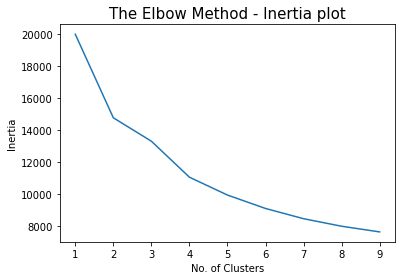

In [13]:
##Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 15)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

In [14]:
inertia

[20007.000000000022,
 14768.314763637245,
 13300.473035337995,
 11044.462628817897,
 9924.980510162348,
 9084.06740751068,
 8442.382961433059,
 7970.226614292219,
 7614.271565774041]

In [15]:
kmeans = KMeans(n_clusters = 4, random_state = 101)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=101)

In [16]:
kmeans.cluster_centers_

array([[ 0.1577855 , -0.14294264,  1.29880838, -0.06770685,  1.6195125 ,
         0.80277345, -0.97972483,  2.04068132,  0.11084913],
       [ 0.1577855 ,  0.02292671, -0.75727638, -0.17887078, -0.80926828,
        -0.82686309,  0.44824454, -0.30568186, -0.13664633],
       [ 0.1577855 ,  0.01888719,  0.62807393,  0.29117659,  0.54985829,
         0.84072784, -0.22739942, -0.24649501,  0.1115326 ],
       [-6.33771778, -0.03132868, -1.52890179, -0.73319347, -0.88630013,
        -1.03126139, -0.30599735, -0.33740394,  0.36759699]])

In [17]:
model_features['Cluster'] = kmeans.labels_ + 1

<ipython-input-17-6aa65b437f9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_features['Cluster'] = kmeans.labels_ + 1


In [18]:
model_features.head()

,Education,Marital_Status,Income,Age,Amount_Total,Total_Purchases,Children,Total_AcceptedCmp,Days_Active,Cluster
0,1,0,58138.0,57.0,1445,25.0,0,1,914,3
1,1,0,46344.0,60.0,25,6.0,2,0,88,2
2,1,1,71613.0,49.0,665,21.0,0,0,447,3
3,1,1,26646.0,30.0,43,8.0,1,0,40,2
4,1,1,58293.0,33.0,376,19.0,1,0,228,3


<AxesSubplot:xlabel='Cluster', ylabel='count'>

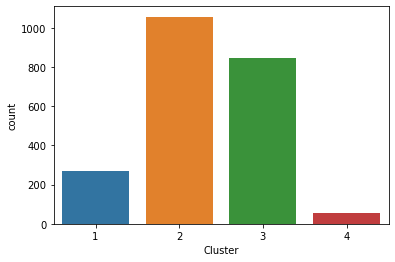

In [19]:
sns.countplot(x='Cluster', data=model_features)

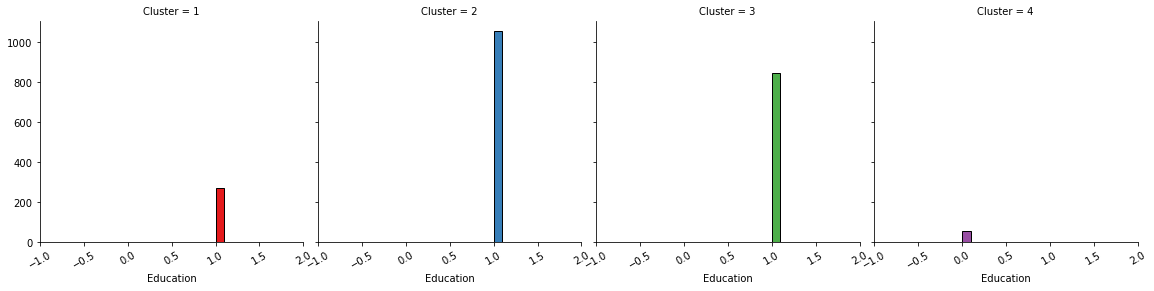

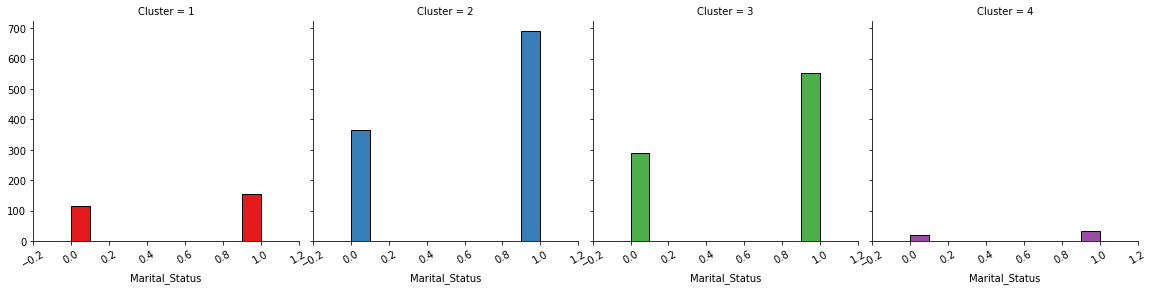

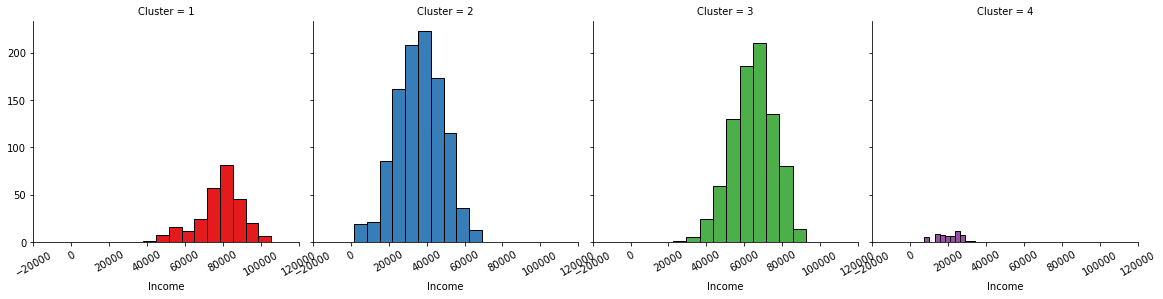

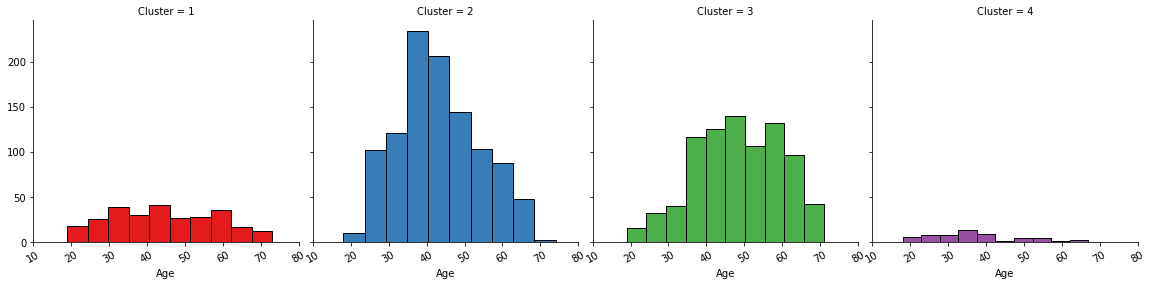

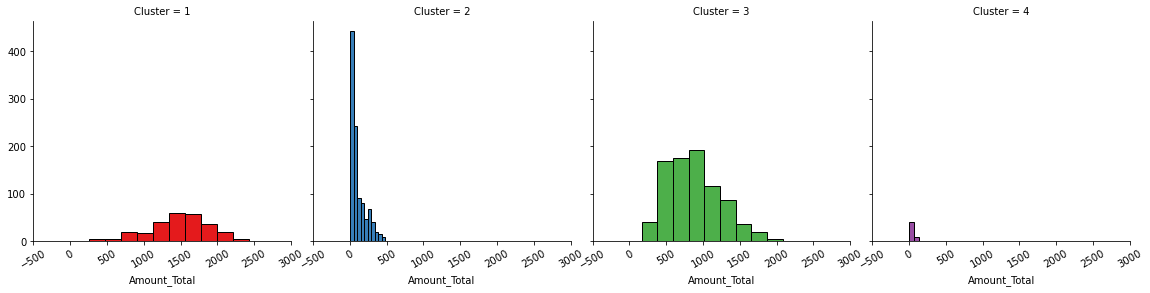

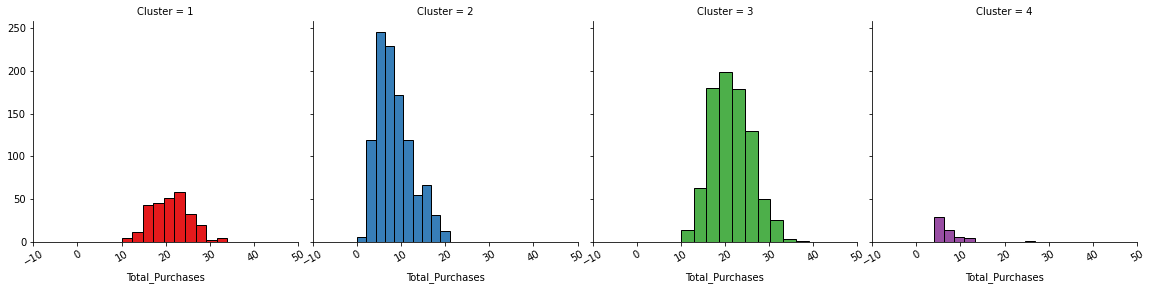

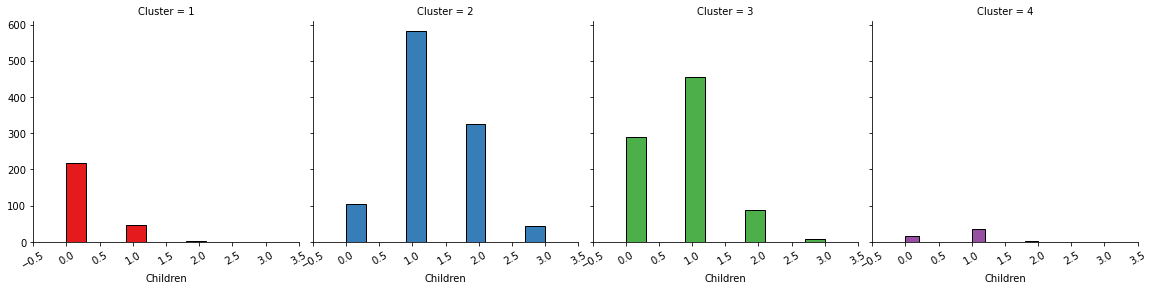

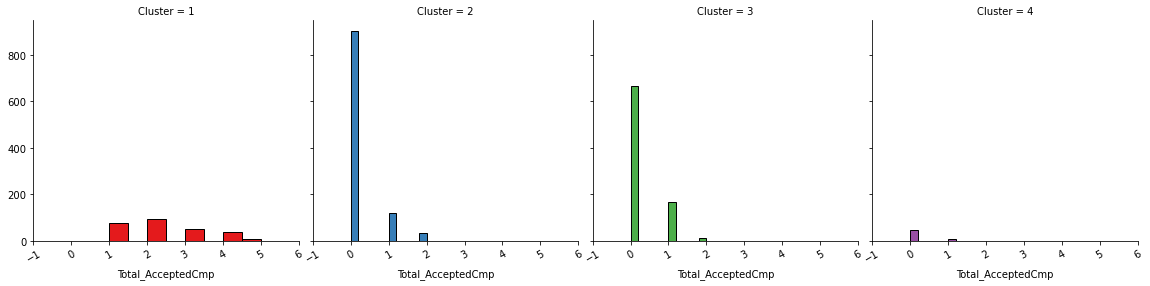

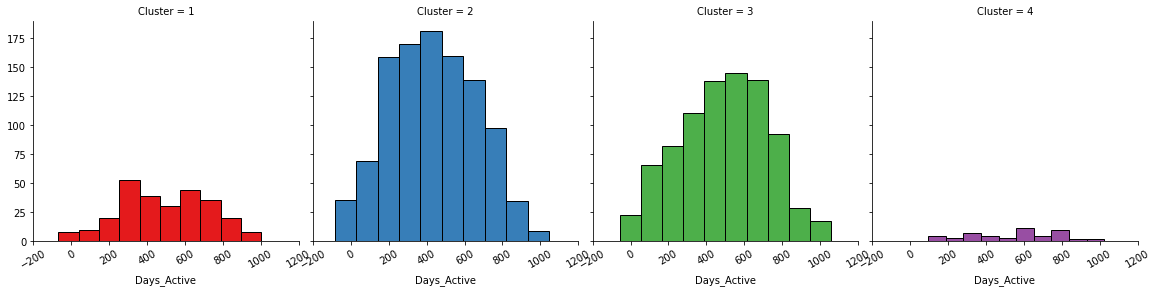

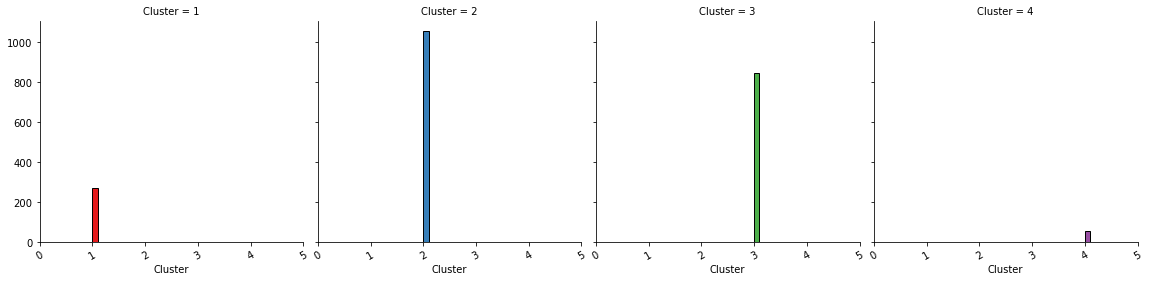

In [20]:
for i in model_features:
    diag = sns.FacetGrid(model_features, col = 'Cluster', hue = 'Cluster', palette = "Set1", height=4)
    diag.map(plt.hist, i, bins=10, ec="k") 
    diag.set_xticklabels(rotation=30, color = 'black')

<font size="4">From this prediction, there are four types of customers: </font>

<font size="4">First type</font><br><br>
<font size="3">- All of them are Postgraduates</font><br>
<font size="3">- Higher number of people who are in relationship than single people</font><br>
<font size="3">- Have an approximately 20k-50k of income</font><br>
<font size="3">- Around 25 to 60 years old with the maximum around 35 to 45 years old</font><br>
<font size="3">- Bought approximately 50-400 products</font><br>
<font size="3">- Made a purchase approximately 5-20 times</font><br>
<font size="3">- Higher number of children than no child</font><br>
<font size="3">- Most of them reject the marketing campaign</font><br>
<font size="3">- Have loyalty with the company for a long period of time</font><br>

<font size="4">Second type</font><br><br>
<font size="3">- Slightly lower number of Postgraduates than the first type</font><br>
<font size="3">- It's the same circumstances as first type but slightly lower number of people</font><br>
<font size="3">- Have an approximately 40k-80k of income</font><br>
<font size="3">- Around 30 to 70 years old with the maximum around 45 to 60 years old</font><br>
<font size="3">- Bought approximately 500-1700 products</font><br>
<font size="3">- Made a purchase approximately 15-30 times</font><br>
<font size="3">- Slightly higher number of children than no child</font><br>
<font size="3">- Most of them reject the marketing campaign</font><br>
<font size="3">- Slightly lower number of loyal people compared to the first type</font><br>

<font size="4">Third type</font><br><br>
<font size="3">- Significantly lower Postgraduates than the second type</font><br>
<font size="3">- The number of people who are in relationship are slightly higher than single people</font><br>
<font size="3">- Have an approximately 70k-90k of income</font><br>
<font size="3">- Around 20 to 70 years old with the maximum around 30 to 60 years old</font><br>
<font size="3">- Bought approximately 800-2000 products</font><br>
<font size="3">- Made a purchase approximately 15-25 times</font><br>
<font size="3">- Higher number of no child than those who have children</font><br>
<font size="3">- None of them reject the marketing campaign</font><br>
<font size="3">- Significantly lower number of loyal people compared to the second type</font><br>

<font size="4">Fourth type</font><br><br>
<font size="3">- All of them are Undergraduates</font><br>
<font size="3">- It's the same circumstances as third type but with lower number of people</font><br>
<font size="3">- Have an approximately 15k-30k of income</font><br>
<font size="3">- Around 20 to 65 years old with the maximum around 35 to 40 years old</font><br>
<font size="3">- Bought approximately 20-100 products</font><br>
<font size="3">- Made a purchase approximately 5-10 times</font><br>
<font size="3">- Slightly higher number of children than no child</font><br>
<font size="3">- Most of them reject the marketing campaign</font><br>
<font size="3">- Least number of loyal people compared to the third type</font><br>